### Figure 4 
Width-averaged terminus position change relative to 01/01/2020. Note that terminus positions plotted between 01/01/2018 and 31/12/2021 were provided by Black & Joughin (2023). The extent of the proglacial rigid mélange is also shown, measured along an extended central flowline at a monthly resolution (Figure S1). 

In [1]:
# IMPORT MODULES
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np 
import datetime

In [2]:
# OPEN THE MAQIT TERMINUS POSITION CSV FILE AND DEFINE THE VARIABLES.
MAQIT_CSV = pd.read_csv(r"R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/data/terminus_position_maqit/MaQiT_output_2018_2023.csv", skiprows=1, parse_dates= {"Date" : ["Year","Month","Day"]})
MAQIT_CSV.sort_values(by='Date', ascending = True, inplace = True) 

# ICE ELEVATION CHANGE IS GIVEN RELATIVE TO 01/2020. WE THEREFORE WANT TO FIND THE INDEX OF THE FIRST OBSERVATION IN JANUARY 2020.
# THIS WILL ENABLE TERMINUS POSITION TO BE SHOWN ON THE SAME SCALE (I.E. RELATIVE TO JAN 2020)
january_2020_index = MAQIT_CSV.index[MAQIT_CSV['Date'] == '2020-01-01'].tolist()
print(f"Index of the row with the first date of January 2020: {january_2020_index[0]}")

# DEFINE THE 'TP_RELATIVE_TO_JAN_2020' USING THE ABOVE INDEX (117)
MAQIT_CSV['TP_RELATIVE_TO_JAN_2020'] = MAQIT_CSV['Terminus position relative to most recent observation (m)'].iloc[117] - MAQIT_CSV['Terminus position relative to most recent observation (m)']
jan_2020 = MAQIT_CSV['Date'][117]
jan_2020_label = jan_2020.strftime('%d/%m/%Y') 
print(f"The date label for the first data of January 2020 is: {jan_2020_label}")

# OPEN THE RIGID MELANGE EXTENT CSV FILE AND DEFINE THE VARIABLES.
melange_CSV = pd.read_csv('R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/data/ice_melange_rigidity/ice_melange_rigidity_2018_2023.csv')
rigid_melange_extent = melange_CSV['melange_terminus_distance']
melange_CSV['TP_source_date'] = pd.to_datetime(melange_CSV['TP_source_date'],  format='%d/%m/%Y')
terminus_position_date = melange_CSV['TP_source_date']

Index of the row with the first date of January 2020: 117
The date label for the first data of January 2020 is: 01/01/2020


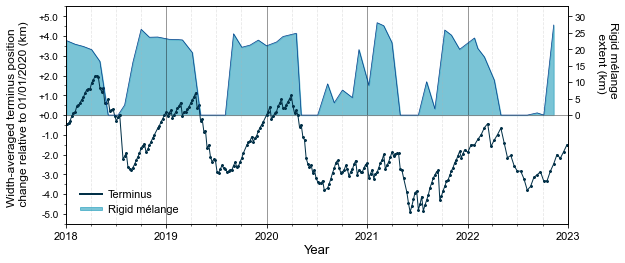

In [3]:
# PRODUCE A FIGURE SHOWING TERMINUS POSITION (RELATIVE TO 01/2020) AND RIGID MELANGE EXTENT
plt.rcParams["font.family"] = "Arial"
fig, ax1 = plt.subplots(figsize=(9, 4))
plt.grid(axis = 'x', alpha=0.5, linestyle='-', color='black')
ax1.xaxis.grid(True, which='minor', linestyle='--', alpha=0.3)
ax1.axhline(y=0, color='gray', linestyle='-', linewidth=0.8) # Add a horizontal line at 0.
ytitle_terminus = f"Width-averaged terminus position \n change relative to {jan_2020_label} (km)"
ytitle_melange = 'Rigid mélange \n extent (km)'
ax1.set_xlabel('Year', labelpad=3, fontsize=13)

# PLOT THE TERMINUS POSITION RELATIVE TO JAN 2020
ax1.scatter(MAQIT_CSV['Date'], MAQIT_CSV['TP_RELATIVE_TO_JAN_2020']/1000, color='#023047', s=4, marker='x', zorder=2)
ax1.plot(MAQIT_CSV['Date'], MAQIT_CSV['TP_RELATIVE_TO_JAN_2020']/1000, color='#023047', linewidth=1, zorder=2, label='Terminus')
ax1.set_ylabel(ytitle_terminus, labelpad=10, fontsize=12)

# PLOT THE MELANGE EXTENT FILL ON THE SAME AXES (/6000) IN ORDER TO ALLOW FOR CORRECT ORDERING
ax1.fill_between(terminus_position_date, 0, rigid_melange_extent/6000, alpha=0.6, color='#219ebc', zorder=0, label='Rigid mélange')

# FORMAT THE Y-AXIS TICK LIMITS FOR THE TERMINUS POSITION  
min_y_value = -5
max_y_value = 5
interval_y = 1

def format_y_ticks(y, pos):
    if y >= 0:
        return f'+{y:.1f}'  # Add a '+' sign for non-negative values
    else:
        return f'{y:.1f}'

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_ticks))
ax1.set_ylim(bottom=min_y_value-0.5, top=max_y_value+0.5)
ax1.set_yticks(np.arange(min_y_value, max_y_value+0.1, interval_y))
minor_locator = ticker.MultipleLocator(base=0.5)
ax1.yaxis.set_minor_locator(minor_locator)

# ADD SECOND Y-AXIS FOR MELANGE EXTENT
ax2 = ax1.twinx()
ax2.plot(terminus_position_date, rigid_melange_extent/1000, linewidth=0.7, color='#023e8a', zorder=2)
y_axis_label = ax2.set_ylabel(ytitle_melange, labelpad=10, fontsize=12, rotation=-90, verticalalignment='bottom')
y_axis_label.set_y(0.75)

# FORMAT THE Y-AXIS TICK LIMITS FOR THE RIGID MELANGE EXTENT  
ax2.set_ylim(-33, 33)
ax2.set_yticks(np.arange(0, 30+1, 5))

# SET THE X AXIS TICK LIMITS TO RANGE BETWEEN 2018/01/01 AND 2023/01/01
min_x_value = pd.to_datetime('2018-01-01', format='%Y-%m-%d')
max_x_value = pd.to_datetime('2023-01-01', format='%Y-%m-%d')
plt.xlim(min_x_value, max_x_value)
three_month_intervals = mdates.MonthLocator(interval=3)
ax1.xaxis.set_minor_locator(three_month_intervals)

# ADD A LEGEND FOR THE ICE DISCHARGE LINE 
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
legend = ax1.legend(lines + lines2, labels + labels2, loc='lower left', bbox_to_anchor=(0, -0.02), frameon=False, framealpha=1, handletextpad=0.6, handleheight=0.1, fontsize=11, facecolor='white', borderaxespad=0.8, borderpad=0.45, fancybox=False)
legend.set_zorder(20)

for line in legend.get_lines():
    line.set_linewidth(2)  
    line.set_markersize(8)

ax1.tick_params(axis='x', labelsize=11)

#plt.savefig('R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/figures/figure_4.png', dpi=300)